In [1]:
!pip install tensorflow tensorflow-hub


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [3]:
# Load dataset
(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = tf.keras.datasets.cifar10.load_data()

# Take a subset
cifar_train_images = cifar_train_images[:5000] / 255.0
cifar_train_labels = cifar_train_labels[:5000]
cifar_test_images = cifar_test_images[:200] / 255.0
cifar_test_labels = cifar_test_labels[:200]



170498071/170498071 [==============================] - 2s 0us/step


In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# URL for the BiT ResNet model on TensorFlow Hub
model_url = "https://tfhub.dev/google/bit/m-r50x1/1"

# Build the complete model using the Sequential API
# hub.KerasLayer is added directly to the Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32,32, 3)),  # Define input shape
    tf.keras.layers.Rescaling(1./255),  # Normalize inputs to [0, 1]
    hub.KerasLayer(model_url, trainable=True),  # Add the hub.KerasLayer directly
    tf.keras.layers.Dense(10, activation='softmax')  # Final dense layer for classification
])

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
history = model.fit(cifar_train_images, cifar_train_labels, epochs=10,
                    validation_data=(cifar_test_images, cifar_test_labels))



Epoch 1/10
32/32 [==============================] - 26s 337ms/step - loss: 5.8287 - accuracy: 0.0960 - val_loss: 2.8202 - val_accuracy: 0.0900
Epoch 2/10
32/32 [==============================] - 9s 289ms/step - loss: 2.6343 - accuracy: 0.1070 - val_loss: 2.5451 - val_accuracy: 0.0750
Epoch 3/10
32/32 [==============================] - 9s 289ms/step - loss: 2.6034 - accuracy: 0.0930 - val_loss: 2.7244 - val_accuracy: 0.0750
Epoch 4/10
32/32 [==============================] - 9s 287ms/step - loss: 2.6828 - accuracy: 0.0960 - val_loss: 2.8059 - val_accuracy: 0.1050
Epoch 5/10
32/32 [==============================] - 9s 285ms/step - loss: 2.5166 - accuracy: 0.0980 - val_loss: 2.5622 - val_accuracy: 0.1300
Epoch 6/10
32/32 [==============================] - 9s 286ms/step - loss: 2.5191 - accuracy: 0.1160 - val_loss: 2.6348 - val_accuracy: 0.1050
Epoch 7/10
32/32 [==============================] - 9s 285ms/step - loss: 2.4781 - accuracy: 0.1060 - val_loss: 2.4053 - val_accuracy: 0.1400
Epoch

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
# Load entire dataset
(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the images
cifar_train_images = cifar_train_images / 255.0
cifar_test_images = cifar_test_images / 255.0

# Implement data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(cifar_train_images)

# Rebuild the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
    tf.keras.layers.Rescaling(1./255),
    hub.KerasLayer(model_url, trainable=True),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Instantiate EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3) # You can adjust the parameters as needed.

# Fit the model with data augmentation
history = model.fit(datagen.flow(cifar_train_images, cifar_train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(cifar_test_images, cifar_test_labels),
                    callbacks=[early_stopping])


Epoch 1/20
1563/1563 [==============================] - 475s 290ms/step - loss: 2.5002 - accuracy: 0.1018 - val_loss: 2.3525 - val_accuracy: 0.0000e+00
Epoch 2/20
1563/1563 [==============================] - 451s 289ms/step - loss: 2.3281 - accuracy: 0.1082 - val_loss: 2.3125 - val_accuracy: 0.0000e+00
Epoch 3/20
 582/1563 [==========>...................] - ETA: 4:24 - loss: 2.3179 - accuracy: 0.0791

KeyboardInterrupt: 

In [11]:
test_loss, test_acc = model.evaluate(cifar_test_images, cifar_test_labels)
print("\nTest accuracy:", test_acc)

predictions = model.predict(cifar_test_images)
predicted_labels = np.argmax(predictions, axis=1)


7/7 [==============================] - 1s 95ms/step - loss: 2.3041 - accuracy: 0.1400

Test accuracy: 0.14000000059604645
7/7 [==============================] - 2s 93ms/step


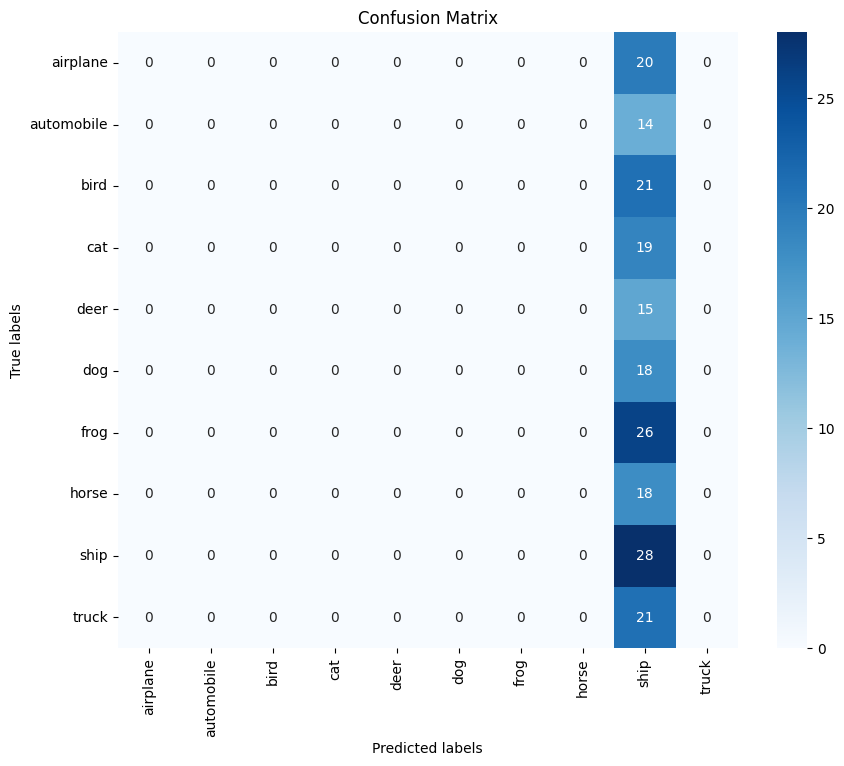

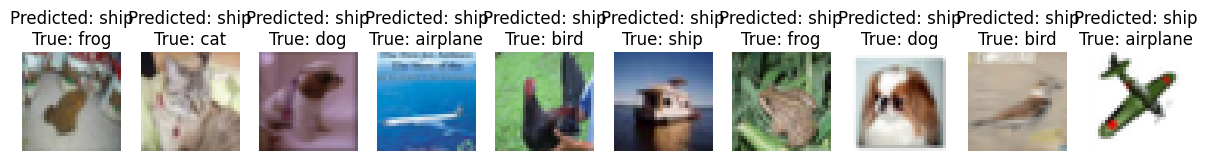

In [13]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# CIFAR-10 Class Names
cifar10_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


# Display the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(cifar_test_labels, predicted_labels), annot=True, fmt='g', cmap='Blues',
            xticklabels=cifar10_labels, yticklabels=cifar10_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Display examples with predicted outputs
num_samples = 10
idx_samples = np.random.choice(len(cifar_test_images), size=num_samples, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(idx_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(cifar_test_images[idx])
    plt.title(f"Predicted: {cifar10_labels[predicted_labels[idx]]}\nTrue: {cifar10_labels[cifar_test_labels[idx][0]]}")
    plt.axis('off')
plt.show()

